# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** ZUHDI AZIZI
- **Email:** shineyvampire@gmail.com
- **ID Dicoding:** judddd

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan PM2.5 dan PM10 pada stasiun changping dan dongsi selama tahun-tahun yang berbeda?
- Apakah ada jam-jam tertentu di mana polutan pada stasiun changping dan dongsi memuncak?
- apakah curah hujan memengaruhi penurunan SO2 dan CO terutama pada stasiun chanping dan dongsi
- Bagaimana distribusi spasial polusi udara (PM2.5, PM10) di wilayah stasiun changping  dibandingkan dengan daerah stasiun dongsi?

## Import Semua Packages/Library yang Digunakan

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Wrangling

### Gathering Data

In [130]:
df_changping = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
df_changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [131]:
df_dongsi = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
df_dongsi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Data terdiri dari aspek aspek yang memengaruhi kualitas udara di suatu wilayah

### Assessing Data

<hr>

#### menilai data (df_changping)
<hr>

>**mencari info dari dataframe**

In [132]:
df_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


>**mencari data missing values**

In [133]:
df_changping.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

>**mengecek values duplicate dan mencari nilai yang tidak masuk akal menggunakan describe()**

In [134]:
print("Jumlah duplikasi: ", df_changping.duplicated().sum())
df_changping.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


>**lakukan hal yang sama pada dataframe selanjutnya**

#### menilai data (df_dongsi)
<hr>

In [135]:
df_dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [136]:
df_dongsi.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [137]:
print("Jumlah duplikasi: ", df_changping.duplicated().sum())
df_changping.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**
- terdapat banyak missing value dan Inaccurate value pada kolom kolom selain no,year,month,day,hour, dan station
- tidak ada duplikasi pada setiap dataframe
- kesalahan data type pada bagian year,month,dan day

## Cleaning Data
<hr>

#### 1.Cleaning df_changping
<hr>

>**membuat variabel kolom_aspek_changping untuk menyimpan kolom dari dataframe yang menggunakan tipe data 'float 64' dan 'int 64' karena kebanyak missing values merupakan data denga tipe tersebut**

In [138]:
kolom_aspek_changping = df_changping.select_dtypes(include=['float64', 'int64']).columns

>**mengisi missing values pada variabel kolom_aspek_changping dengan rata rata data data dari variabel tersebut**

In [139]:
df_changping[kolom_aspek_changping] = df_changping[kolom_aspek_changping].fillna(df_changping[kolom_aspek_changping].mean())

**melihat informasi**

In [140]:
df_changping.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

>**kolom wd tidak berubah karena berbeda tipe data yaitu object(string),selanjutnya kita mencari dominant value untuk mengganti missing values pada kolom wd**

In [141]:
df_changping.wd.value_counts()

wd
NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: count, dtype: int64

>**menngganti wd dengan dominant values**

In [142]:
df_changping.fillna(value="NNW", inplace=True)

In [143]:
df_changping.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [144]:
df_changping.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.524179,82.746329,20.786642,29.237672,1078.866266,53.846809,11.356720,10.218370,13.811648,0.752352,1.309005
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,129.000000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


>**mencari outliers dengan metode IQR lalu mengubah niali outliers menjadi rata rata dari masing masing kolom**

In [ ]:
for column in kolom_aspek_changping:
    Q1 = df_changping[column].quantile(0.25)
    Q3 = df_changping[column].quantile(0.75)
    IQR = Q3 - Q1

    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)

    nilai_mean = df_changping[column].mean()

    kondisi_lower_than = df_changping[column] < minimum
    kondisi_more_than = df_changping[column] > maximum

    df_changping[column].mask(cond=kondisi_more_than, other=nilai_mean, inplace=True)
    df_changping[column].mask(cond=kondisi_lower_than, other=nilai_mean, inplace=True)


In [146]:
df_changping.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,60.228115,84.300989,10.130661,42.062581,931.490641,50.147147,13.686111,1007.760278,1.505495,0.002412,1.612952
std,10122.249256,1.177213,3.448752,8.800218,6.922285,49.941332,60.686240,9.355663,25.394077,560.649147,38.976439,11.356720,10.218370,13.811648,0.011823,0.860743
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,84.000000,118.000000,14.958906,57.000000,1152.301345,70.000000,23.300000,1016.000000,14.200000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,218.000000,271.000000,42.000000,117.000000,2700.000000,173.000000,41.400000,1036.500000,27.200000,0.060366,4.200000


>**melakukan hal yang sama pada dataframe selanjutnya**

#### 2.Cleaning df_dongsi
<hr>

In [147]:
kolom_aspek_dongsi = df_dongsi.select_dtypes(include=['float64', 'int64']).columns

df_dongsi[kolom_aspek_dongsi] = df_dongsi[kolom_aspek_dongsi].fillna(df_dongsi[kolom_aspek_dongsi].mean())


In [148]:
df_dongsi.isna().sum()


No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64

In [149]:
df_dongsi.wd.value_counts()


wd
ENE    3861
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64

In [150]:
df_dongsi.fillna(value="ENE", inplace=True)


In [151]:
df_dongsi.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [ ]:
for column in kolom_aspek_dongsi:
    Q1 = df_dongsi[column].quantile(0.25)
    Q3 = df_dongsi[column].quantile(0.75)
    IQR = Q3 - Q1

    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)

    nilai_mean = df_dongsi[column].mean()

    kondisi_lower_than = df_dongsi[column] < minimum
    kondisi_more_than = df_dongsi[column] > maximum

    df_dongsi[column].mask(cond=kondisi_more_than, other=nilai_mean, inplace=True)
    df_dongsi[column].mask(cond=kondisi_lower_than, other=nilai_mean, inplace=True)



In [153]:
df_dongsi.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,73.462460,98.149432,13.884070,51.510940,1116.305675,50.381555,13.67149,1012.547419,2.447535,0.002540,1.687034
std,10122.249256,1.177213,3.448752,8.800218,6.922285,59.378173,71.322739,12.291397,29.235423,647.534886,41.952618,11.45515,10.263131,13.806757,0.012496,0.950903
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.80000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.10000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,63.000000,88.000000,10.000000,49.000000,1100.000000,46.000000,14.60000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,102.000000,137.000000,18.531107,69.000000,1330.069131,72.000000,23.50000,1020.900000,15.000000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,258.000000,318.000000,54.000000,138.000000,3100.000000,180.000000,41.10000,1042.000000,28.800000,0.064020,4.500000


<hr>

>**mengganti tipe data pada kolom year,month,day,dan jam dari int64 ke bentuk datetime tapi bukan dengan masing masing kolom tapi disatukan kedalam satu kolom**

>**disini menggunakan fungsi**

In [154]:
def gabung_tanggal(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    return df
    
df_changping = gabung_tanggal(df_changping)
df_dongsi = gabung_tanggal(df_dongsi)

>**menghapus kolom year, month, day, hour dengan menerapkan fungsi dan menggunakan metode drop**

In [155]:
def hapus_kolom_waktu(df):
    df = df.drop(columns=['year', 'month', 'day', 'hour'])
    return df
    
df_changping = hapus_kolom_waktu(df_changping)
df_dongsi = hapus_kolom_waktu(df_dongsi)

>**mengecek apakah sudah berhasil**

In [156]:
df_changping.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


>**memindahkan kolom date ke posisi disebelah no**

In [157]:
def pindah_kolom(df):
    df = df[['No'] + ['date'] + [col for col in df.columns if col != 'No' and col != 'date']]
    return df
    
df_changping = pindah_kolom(df_changping)
df_dongsi = pindah_kolom(df_dongsi)

>**mengecek apakah sudah berhasil**

In [158]:
df_changping.head()

,No,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013-03-01 01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013-03-01 02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013-03-01 03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013-03-01 04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- data sudah tidak memiliki nilai yang tidak masuk akal
- data waktu sudah bisa dilihat lebih mudah

## Exploratory Data Analysis (EDA)

>**menggabungkan semua dataframe menjadi satu**

In [159]:
df_gabungan_data = pd.concat([df_changping,
                              df_dongsi], ignore_index=True)

>**cek apakah penggabungan data sudah berhasil**

In [160]:
df_gabungan_data.head(70000)

,No,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013-03-01 01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013-03-01 02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013-03-01 03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013-03-01 04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,34932,2017-02-23 11:00:00,12.0,25.0,8.0,28.0,700.0,52.0,5.0,1026.8,-13.4,0.0,NW,2.1,Dongsi
69996,34933,2017-02-23 12:00:00,15.0,15.0,6.0,17.0,600.0,68.0,5.9,1025.5,-13.7,0.0,NW,2.0,Dongsi
69997,34934,2017-02-23 13:00:00,13.0,13.0,4.0,16.0,500.0,73.0,6.9,1024.0,-15.2,0.0,NNW,2.6,Dongsi
69998,34935,2017-02-23 14:00:00,5.0,5.0,3.0,11.0,400.0,80.0,8.1,1022.8,-15.5,0.0,NW,2.8,Dongsi


### Explore df_gabungan_data

>**dari data dibawah ini dapat diketahui bahwa persebaran data yang luas menurut rentang antara std dan mean,tapi jika kita melihat dari mean nya setiap stasiun pengamatan memiliki tingkat pm2.5 dan pm10 yang besar dimana tidak sehat bagi manusia**
>
>tapi dari data tersebut mean dari masing masing kolom dari df_chanping lebih rendah dari df_dongsi

In [161]:
df_changping.groupby(by = "station").agg({
    "No": "nunique",
    "PM2.5": ["mean", "std"],
    "PM10": ["mean", "std"],
    "SO2": ["mean", "std"],
    "NO2": ["mean", "std"],
    "CO": ["mean", "std"],
    "O3": ["mean", "std"]
})

No      PM2.5                  PM10                  SO2  \
          nunique       mean        std       mean       std       mean   
station                                                                   
Changping   35064  60.228115  49.941332  84.300989  60.68624  10.130661   

                           NO2                     CO                     O3  \
                std       mean        std        mean         std       mean   
station                                                                        
Changping  9.355663  42.062581  25.394077  931.490641  560.649147  50.147147   

                      
                 std  
station               
Changping  38.976439

In [162]:
df_dongsi.groupby(by = "station").agg({
    "No": "nunique",
    "PM2.5": ["mean", "std"],
    "PM10": ["mean", "std"],
    "SO2": ["mean", "std"],
    "NO2": ["mean", "std"],
    "CO": ["mean", "std"],
    "O3": ["mean", "std"]
})

No     PM2.5                  PM10                  SO2  \
        nunique      mean        std       mean        std      mean   
station                                                                
Dongsi    35064  73.46246  59.378173  98.149432  71.322739  13.88407   

                         NO2                      CO                     O3  \
               std      mean        std         mean         std       mean   
station                                                                       
Dongsi   12.291397  51.51094  29.235423  1116.305675  647.534886  50.381555   

                    
               std  
station             
Dongsi   41.952618

>**Mari kita persempit lagi ke dalam data per bulan**
>
>dalam data tersebut nilai mean dari masing masing polutan terbilang cukup stabil tapi terdapat perbedaan antar stasiun pengamatan sama seperti diatas

In [163]:
df_gabungan_data.groupby(by = ["station",df_gabungan_data['date'].dt.month]).agg({
    "No": "nunique",
    "PM2.5": ["mean", "std"],
    "PM10": ["mean", "std"],
    "SO2": ["mean", "std"],
    "NO2": ["mean", "std"],
    "CO": ["mean", "std"],
    "O3": ["mean", "std"]
})

No      PM2.5                   PM10             \
               nunique       mean        std        mean        std   
station   date                                                        
Changping 1       2976  63.928200  54.560401   87.383109  64.824945   
          2       2712  57.870544  53.252313   79.752589  65.233284   
          3       2976  65.247722  54.502546  103.780941  70.464269   
          4       2880  65.270368  49.006284  100.237343  60.581458   
          5       2976  56.985879  43.351918   90.787006  56.658893   
          6       2880  57.189361  47.749420   74.745759  51.640295   
          7       2976  61.637420  47.899852   75.072359  52.296750   
          8       2976  46.326476  39.344292   62.363663  45.266646   
          9       2880  52.283047  43.580279   67.331049  50.599417   
          10      2976  63.468912  50.145281   88.926135  62.084268   
          11      2880  67.909706  53.649806   91.870311  63.670341   
          12      2976  64.466740  55.170544   88.860717  65.198637   
Dongsi    1       2976  76.692691  65.404261   96.656098  73.889981   
          2       2712  70.206013  65.611444   91.160158  77.941937   
          3       2976  82.443207  64.740665  120.026542  80.945097   
          4       2880  75.390207  54.062529  115.968853  67.247792   
          5       2976  67.678529  47.581241  103.047582  61.817007   
          6       2880  70.921433  51.899841   86.902504  58.227925   
          7       2976  79.555388  54.460786   86.709040  56.243302   
          8       2976  59.174049  43.784810   74.216106  52.692908   
          9       2880  66.607283  54.363029   84.956839  60.160701   
          10      2976  77.075503  63.285535  108.237701  80.207141   
          11      2880  80.928851  68.437223  108.902837  81.871179   
          12      2976  74.587425  68.435256  100.522244  80.586690   

                      SO2                   NO2                      CO  \
                     mean        std       mean        std         mean   
station   date                                                            
Changping 1     16.437224   9.704943  52.081427  28.607715  1081.150200   
          2     14.501299   9.737588  46.574662  27.651658  1018.296042   
          3     14.912969  10.272054  50.822987  28.057729  1090.786334   
          4     10.370105   8.899318  40.659520  22.582132   787.777315   
          5      9.844009   9.322182  34.293808  18.178072   711.209962   
          6      6.563434   6.808537  30.068268  16.266935   808.983353   
          7      4.831794   4.990998  27.400718  15.622960   832.437499   
          8      4.458749   5.046777  27.751380  15.931876   731.018863   
          9      5.084520   5.439513  38.002193  19.275560   847.654009   
          10     6.669179   6.714753  50.730663  23.886290  1021.237413   
          11    12.181854   9.651956  52.565055  27.892929  1157.631931   
          12    15.896557   9.801117  53.976193  29.661452  1093.407959   
Dongsi    1     20.091479  13.031356  56.609233  30.172557  1251.450391   
          2     17.306650  12.647838  46.566494  27.025117  1113.814435   
          3     19.515968  13.795459  56.656653  31.886553  1222.691158   
          4     15.204294  12.304272  46.881574  28.399238   913.387612   
          5     14.624031  12.622282  44.575952  26.421608   908.329018   
          6     10.374703  10.657326  45.554913  23.723376  1045.101387   
          7      7.727320   6.989517  41.775334  20.924601  1103.988089   
          8      6.195419   5.916897  41.429302  22.606120   991.738246   
          9      7.951225   8.501363  52.966289  26.445747  1077.021941   
          10    10.698133  10.061346  61.374726  30.862255  1184.839508   
          11    16.261990  12.090213  61.307828  32.460458  1333.533908   
          12    20.775945  13.155741  62.015872  34.389136  1246.448898   

                                   O3             
                       st

>**mempersempit data ke dalam data per hari**
>
>nilai mean juga cukup stabil jadi tidak ada pola

In [164]:
df_changping.groupby(by = ["station",df_gabungan_data['date'].dt.day]).agg({
    "No": "nunique",
    "PM2.5": ["mean", "std"],
    "PM10": ["mean", "std"],
    "SO2": ["mean", "std"],
    "NO2": ["mean", "std"],
    "CO": ["mean", "std"],
    "O3": ["mean", "std"]
})

No      PM2.5                   PM10             \
               nunique       mean        std        mean        std   
station   date                                                        
Changping 1       1152  63.056316  53.893986   84.337010  62.883102   
          2       1152  60.121690  52.143865   78.278302  60.021547   
          3       1152  61.027323  55.204962   86.647637  64.001283   
          4       1152  61.550840  52.723407   85.259707  61.929585   
          5       1152  57.018378  48.667541   79.984167  59.199919   
          6       1152  64.915341  50.159056   89.262494  63.299980   
          7       1152  65.453365  52.840172   88.855216  63.081852   
          8       1152  60.364734  54.093988   84.011078  64.362470   
          9       1152  57.401894  48.880980   77.698509  57.658429   
          10      1152  51.662226  41.877379   74.660635  53.414096   
          11      1152  51.528983  47.581405   73.742872  58.127947   
          12      1152  54.079419  47.213931   74.103778  55.020400   
          13      1152  59.880899  52.751490   79.404445  57.488662   
          14      1152  58.437218  51.060604   86.004796  62.224082   
          15      1152  62.503270  47.669514  100.870635  68.767304   
          16      1152  63.110134  50.757843   93.872623  62.965877   
          17      1152  65.744428  48.138839   93.955568  61.611146   
          18      1152  64.846169  52.615193   87.204020  61.897804   
          19      1152  63.222726  48.909337   85.010095  55.775434   
          20      1152  57.213260  43.306451   79.571517  55.867477   
          21      1152  64.160485  45.140867   86.907596  54.891199   
          22      1152  60.524810  44.288432   84.086210  54.587630   
          23      1152  60.874807  51.359886   84.747006  62.057870   
          24      1152  57.542257  49.729905   85.231130  64.913691   
          25      1152  65.474020  55.307419   86.739536  63.544840   
          26      1152  56.995369  47.253507   81.711278  57.182582   
          27      1152  52.461870  44.633268   75.994288  57.003495   
          28      1152  60.464903  47.992856   86.780659  62.360878   
          29      1080  57.762108  47.253146   82.198731  57.047247   
          30      1056  63.250656  52.450789   86.099705  59.726198   
          31       672  67.584660  56.578092   94.272884  69.209184   

                      SO2                   NO2                      CO  \
                     mean        std       mean        std         mean   
station   date                                                            
Changping 1     10.468932   9.623594  38.580789  23.683541   921.663786   
          2      9.998813  10.077709  41.334473  26.092282   935.512363   
          3      9.847129   9.571083  41.508016  27.241988   882.604817   
          4     10.132857   9.104638  40.912307  23.604465   917.920087   
          5      9.883905   8.938440  38.453931  22.695850   889.463515   
          6     10.711615   9.515558  42.287030  25.396624  1062.503351   
          7     10.805794   9.828199  42.274243  24.295789   998.995953   
          8     10.484276   9.386349  39.758190  24.975270   920.043839   
          9      9.872938   8.959263  41.183324  25.411408   927.449531   
          10     9.934462   9.391427  41.183312  23.759717   893.794684   
          11     9.407311   8.846949  39.857063  24.831473   911.966702   
          12     9.758872   9.694495  43.164469  27.144168   903.027406   
          13     9.963792   9.253838  43.058859  24.677915   919.751580   
          14    10.180212   9.280902  44.215405  26.488736   916.370906   
          15    11.593414  10.362672  48.315307  27.685644   983.282471   
          16    10.085415   9.826642  45.750330  27.762082   974.586054   
          17    10.553327   9.053930  45.126006  26.210266  1033.604105   
          18    10.177249   9.008559  41.060205  26.411296   931.186166   
          19     9.671932   8.

>**mempersempit data ke dalam data per jam**
>
>nilai mean juga cukup stabil jadi tidak ada pola

In [165]:
df_changping.groupby(by = ["station",df_gabungan_data['date'].dt.hour]).agg({
    "No": "nunique",
    "PM2.5": ["mean", "std"],
    "PM10": ["mean", "std"],
    "SO2": ["mean", "std"],
    "NO2": ["mean", "std"],
    "CO": ["mean", "std"],
    "O3": ["mean", "std"]
})

No      PM2.5                  PM10                   SO2  \
               nunique       mean        std       mean        std       mean   
station   date                                                                  
Changping 0       1461  61.002650  49.905812  81.863736  60.864011   8.604870   
          1       1461  59.001349  48.547221  79.255285  60.701251   8.638845   
          2       1461  58.115519  48.622861  77.832651  60.424891  11.028775   
          3       1461  57.538107  49.028517  75.734283  59.739841   8.384343   
          4       1461  57.297795  49.536443  73.790914  58.823043   8.403585   
          5       1461  56.244545  49.103652  72.698061  58.138063   8.249751   
          6       1461  55.785613  47.931801  74.843654  57.170851   8.867730   
          7       1461  57.534758  48.647235  79.589321  56.227495   9.763249   
          8       1461  59.460425  48.654896  84.473503  57.121104  10.788578   
          9       1461  62.765284  50.430860  90.291850  62.254469  11.570623   
          10      1461  63.519897  51.357259  90.257428  63.489872  12.542454   
          11      1461  61.934405  51.321561  87.591860  63.597031  12.294202   
          12      1461  60.709079  50.543932  84.628839  61.795464  11.948779   
          13      1461  60.395460  51.622594  81.467793  60.658716  11.343698   
          14      1461  58.722563  50.192942  81.325208  60.799320  11.211404   
          15      1461  58.910794  51.429974  82.653084  60.227975  10.836584   
          16      1461  58.235640  50.684591  84.557119  60.889683  10.535556   
          17      1461  59.093889  50.977260  88.241812  62.363116  10.095600   
          18      1461  60.779447  50.534733  91.413774  60.300065  10.155769   
          19      1461  63.613805  49.943352  96.037802  60.104389  10.059228   
          20      1461  64.599910  49.240227  96.441747  59.564623   9.938338   
          21      1461  65.096421  50.197331  94.723241  60.780345   9.670024   
          22      1461  63.671575  49.733736  89.122878  60.532172   9.309518   
          23      1461  61.445840  48.898236  84.387898  60.739845   8.894363   

                                 NO2                      CO              \
                      std       mean        std         mean         std   
station   date                                                             
Changping 0      8.774399  42.309805  25.847121   937.774012  564.830177   
          1      9.139147  40.921621  25.135446   948.078804  561.263546   
          2     10.141507  39.772994  24.892687   896.714108  577.377055   
          3      8.675793  39.563618  24.302011   892.931334  547.870002   
          4      8.675680  40.362205  23.685678   885.597683  557.930935   
          5      8.537849  41.813939  23.977125   894.192416  557.787985   
          6      9.072947  43.251762  24.045776   941.167925  548.210799   
          7      9.515426  46.811289  22.820123   975.833701  540.079025   
          8      9.558549  48.826404  22.244169  1018.302576  548.212135   
          9      9.328169  48.356124  24.223065  1015.043727  538.222501   
          10     9.991600  45.936608  25.860894   989.105966  548.482967   
          11     9.795804  41.534158  25.590244   945.697933  552.759607   
          12     9.810451  38.116096  25.243660   904.634513  555.412300   
          13     9.277357  35.692914  25.050696   877.096647  554.608473   
          14     9.511226  34.446971  24.623941   850.398083  547.979177   
          15     9.411625  34.492801  24.613964   856.240582  558.702784   
          16     9.263873  35.415158  25.019029   848.401908  558.224761   
          17     8.928234  37.799725  25.773295   863.698487  555.156276   
          18     9.140021  42.099874  26.553775   923.276924  566.444294   
          19     9.157200  46.470814  26.961493   976.733413  583.173317   
          20     9.340836  47.975744  25.934830   988.874290  568.547420   
        

>**mengetahui korelasi antar polutan dan kondisi cuaca untuk mencari hubungan antar aspek dengan metode corr()**
>
>dari data tersebut diketahui bahwa kondisi cuaca tidak terlalu berpengaruh karena menunjukkan korelasi yang lemah,namun diketahui korelasi antar polutan yang menunjukkan nilai positif yang banyak diatas 0.5

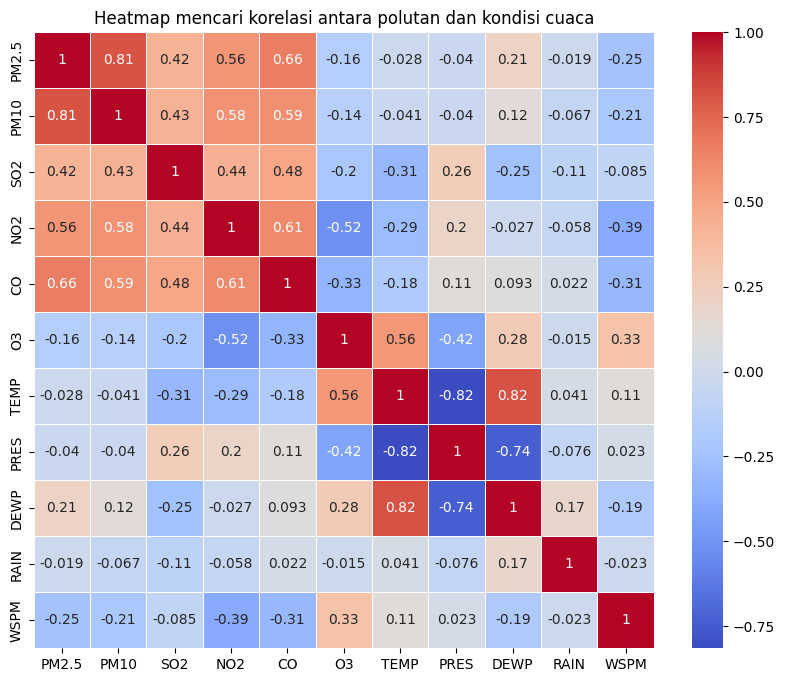

In [166]:
kolom_banding = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

df_corr = df_gabungan_data[kolom_banding].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap mencari korelasi antara polutan dan kondisi cuaca')
plt.show()

>**membuktikan korelasi antar polutan dengan scatterplot**
>
>masing masing PM yang dibandingkan denga CO memiliki korelasi lemah dam jika dibandingkan dengan NO2 keduanya mempunya korelasi yang lemah juga

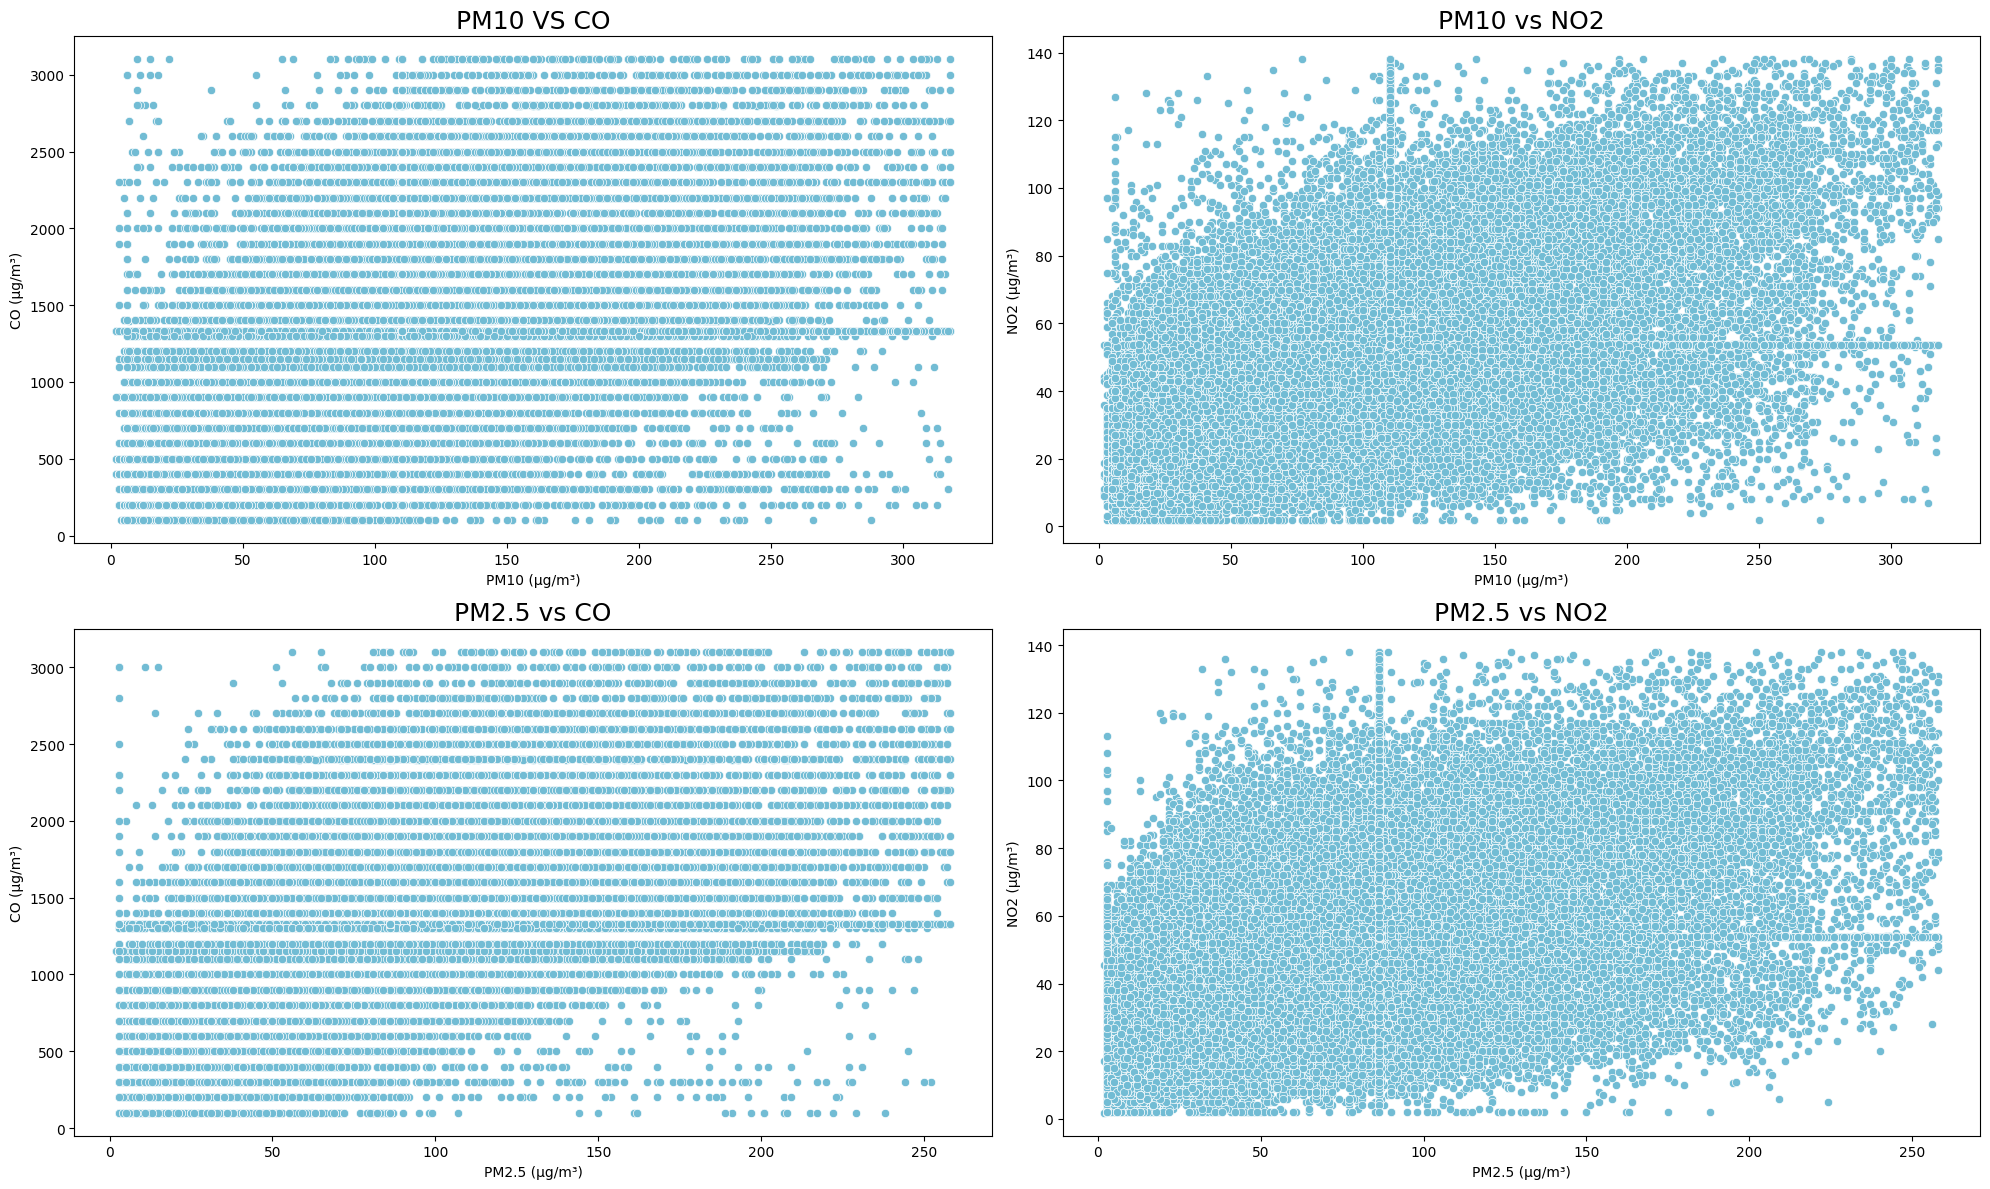

In [167]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.scatterplot(x='PM10', y='CO', data=df_gabungan_data, color="#72BCD4", ax=ax[0, 0])
ax[0, 0].set_title("PM10 VS CO", loc="center", fontsize=18)
ax[0, 0].set_xlabel("PM10 (µg/m³)")
ax[0, 0].set_ylabel("CO (µg/m³)")

sns.scatterplot(x='PM10', y='NO2', data=df_gabungan_data, color="#72BCD4", ax=ax[0, 1])
ax[0, 1].set_title("PM10 vs NO2", loc="center", fontsize=18)
ax[0, 1].set_xlabel("PM10 (µg/m³)")
ax[0, 1].set_ylabel("NO2 (µg/m³)")

sns.scatterplot(x='PM2.5', y='CO', data=df_gabungan_data, color="#72BCD4", ax=ax[1, 0])
ax[1, 0].set_title("PM2.5 vs CO", loc="center", fontsize=18)
ax[1, 0].set_xlabel("PM2.5 (µg/m³)")
ax[1, 0].set_ylabel("CO (µg/m³)")

sns.scatterplot(x='PM2.5', y='NO2', data=df_gabungan_data, color="#72BCD4", ax=ax[1, 1])
ax[1, 1].set_title("PM2.5 vs NO2", loc="center", fontsize=18)
ax[1, 1].set_xlabel("PM2.5 (µg/m³)")
ax[1, 1].set_ylabel("NO2 (µg/m³)")

plt.tight_layout()
plt.show()

**Insight:**
- perbedaan data mean masing masing kolom pada setiap stasiun
- korelasi lemah antara PM2.5,PM10 dan NO2,CO

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan PM2.5 dan PM10 pada stasiun changping dan dongsi selama tahun-tahun yang berbeda?

>**melakukan indexing dengan mengambil data tahun dan mean dari tiap kolom**

In [168]:
tahunan_changping = df_changping.groupby(df_changping['date'].dt.year)[['PM2.5', 'PM10']].mean()
tahunan_dongsi = df_dongsi.groupby(df_changping['date'].dt.year)[['PM2.5', 'PM10']].mean()

>**menggunakan line chart untuk visualisasi rata rata perubahan polutan yang ditanyakan**

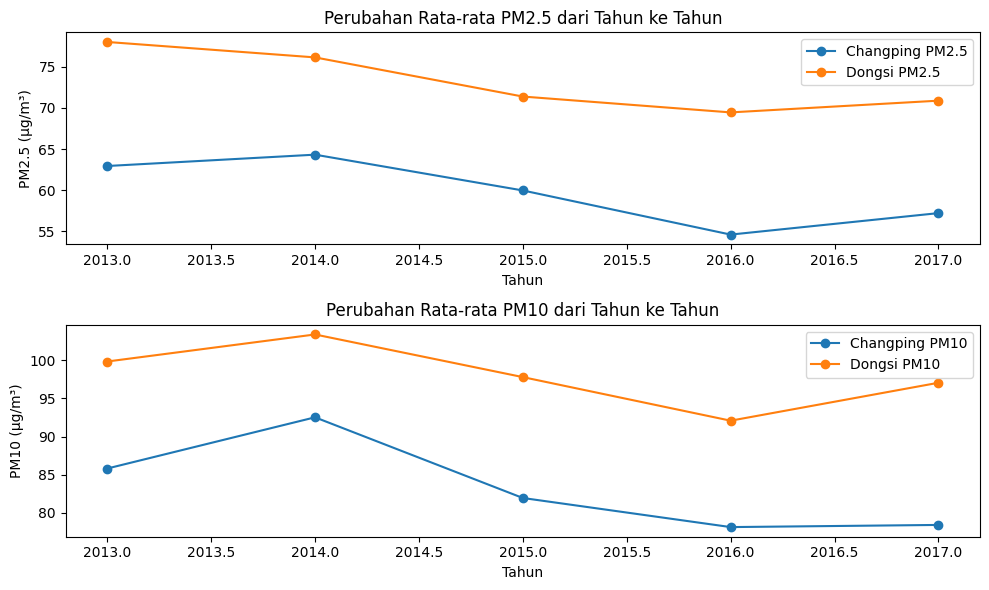

In [169]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(tahunan_changping.index, tahunan_changping['PM2.5'], label='Changping PM2.5', marker='o')
plt.plot(tahunan_dongsi.index, tahunan_dongsi['PM2.5'], label='Dongsi PM2.5', marker='o')
plt.title('Perubahan Rata-rata PM2.5 dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(tahunan_changping.index, tahunan_changping['PM10'], label='Changping PM10', marker='o')
plt.plot(tahunan_dongsi.index, tahunan_dongsi['PM10'], label='Dongsi PM10', marker='o')
plt.title('Perubahan Rata-rata PM10 dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('PM10 (µg/m³)')
plt.legend()

plt.tight_layout()
plt.show()

### Pertanyaan 2:Apakah ada jam-jam tertentu di mana polutan pada stasiun changping dan dongsi memuncak?

>**melakukan indexing dengan mengambil data jam dan mean dari tiap kolom**

In [170]:
changping_jam = df_changping.groupby(df_changping['date'].dt.hour)[['PM2.5', 'PM10', 'SO2', 'NO2']].mean()
dongsi_jam = df_dongsi.groupby(df_changping['date'].dt.hour)[['PM2.5', 'PM10', 'SO2', 'NO2']].mean()

>**menggunakan stacked bar chart untuk visualisasi perubahan rata rata polutan perjam**

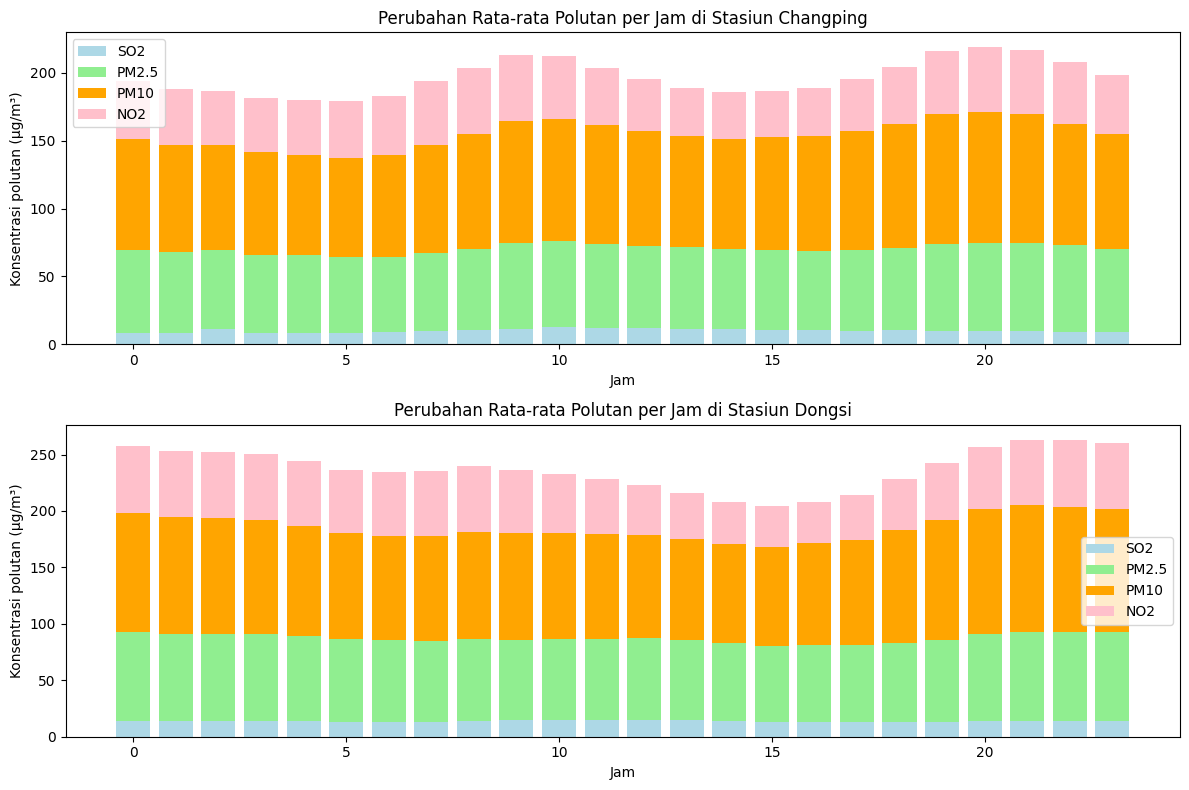

In [171]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(changping_jam.index, changping_jam['SO2'], label='SO2', color='lightblue')
plt.bar(changping_jam.index, changping_jam['PM2.5'], label='PM2.5', bottom=changping_jam['SO2'], color='lightgreen')
plt.bar(changping_jam.index, changping_jam['PM10'], label='PM10', bottom=changping_jam['SO2'] + changping_jam['PM2.5'], color='orange')
plt.bar(changping_jam.index, changping_jam['NO2'], label='NO2', bottom=changping_jam['SO2'] + changping_jam['PM2.5'] + changping_jam['PM10'], color='pink')
plt.title('Perubahan Rata-rata Polutan per Jam di Stasiun Changping')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi polutan (µg/m³)')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(dongsi_jam.index, dongsi_jam['SO2'], label='SO2', color='lightblue')
plt.bar(dongsi_jam.index, dongsi_jam['PM2.5'], label='PM2.5', bottom=dongsi_jam['SO2'], color='lightgreen')
plt.bar(dongsi_jam.index, dongsi_jam['PM10'], label='PM10', bottom=dongsi_jam['SO2'] + dongsi_jam['PM2.5'], color='orange')
plt.bar(dongsi_jam.index, dongsi_jam['NO2'], label='NO2', bottom=dongsi_jam['SO2'] + dongsi_jam['PM2.5'] + dongsi_jam['PM10'], color='pink')
plt.title('Perubahan Rata-rata Polutan per Jam di Stasiun Dongsi')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi polutan (µg/m³)')
plt.legend()

plt.tight_layout()
plt.show()

### Pertanyaan 3:apakah curah hujan memengaruhi penurunan SO2 dan CO terutama pada stasiun chanping dan dongsi?

>**seperti yang kita ketahui sebelumnya bahwa curah hujan tidak ada korelasi apapun kita akan buktikan dengan scatterplot**

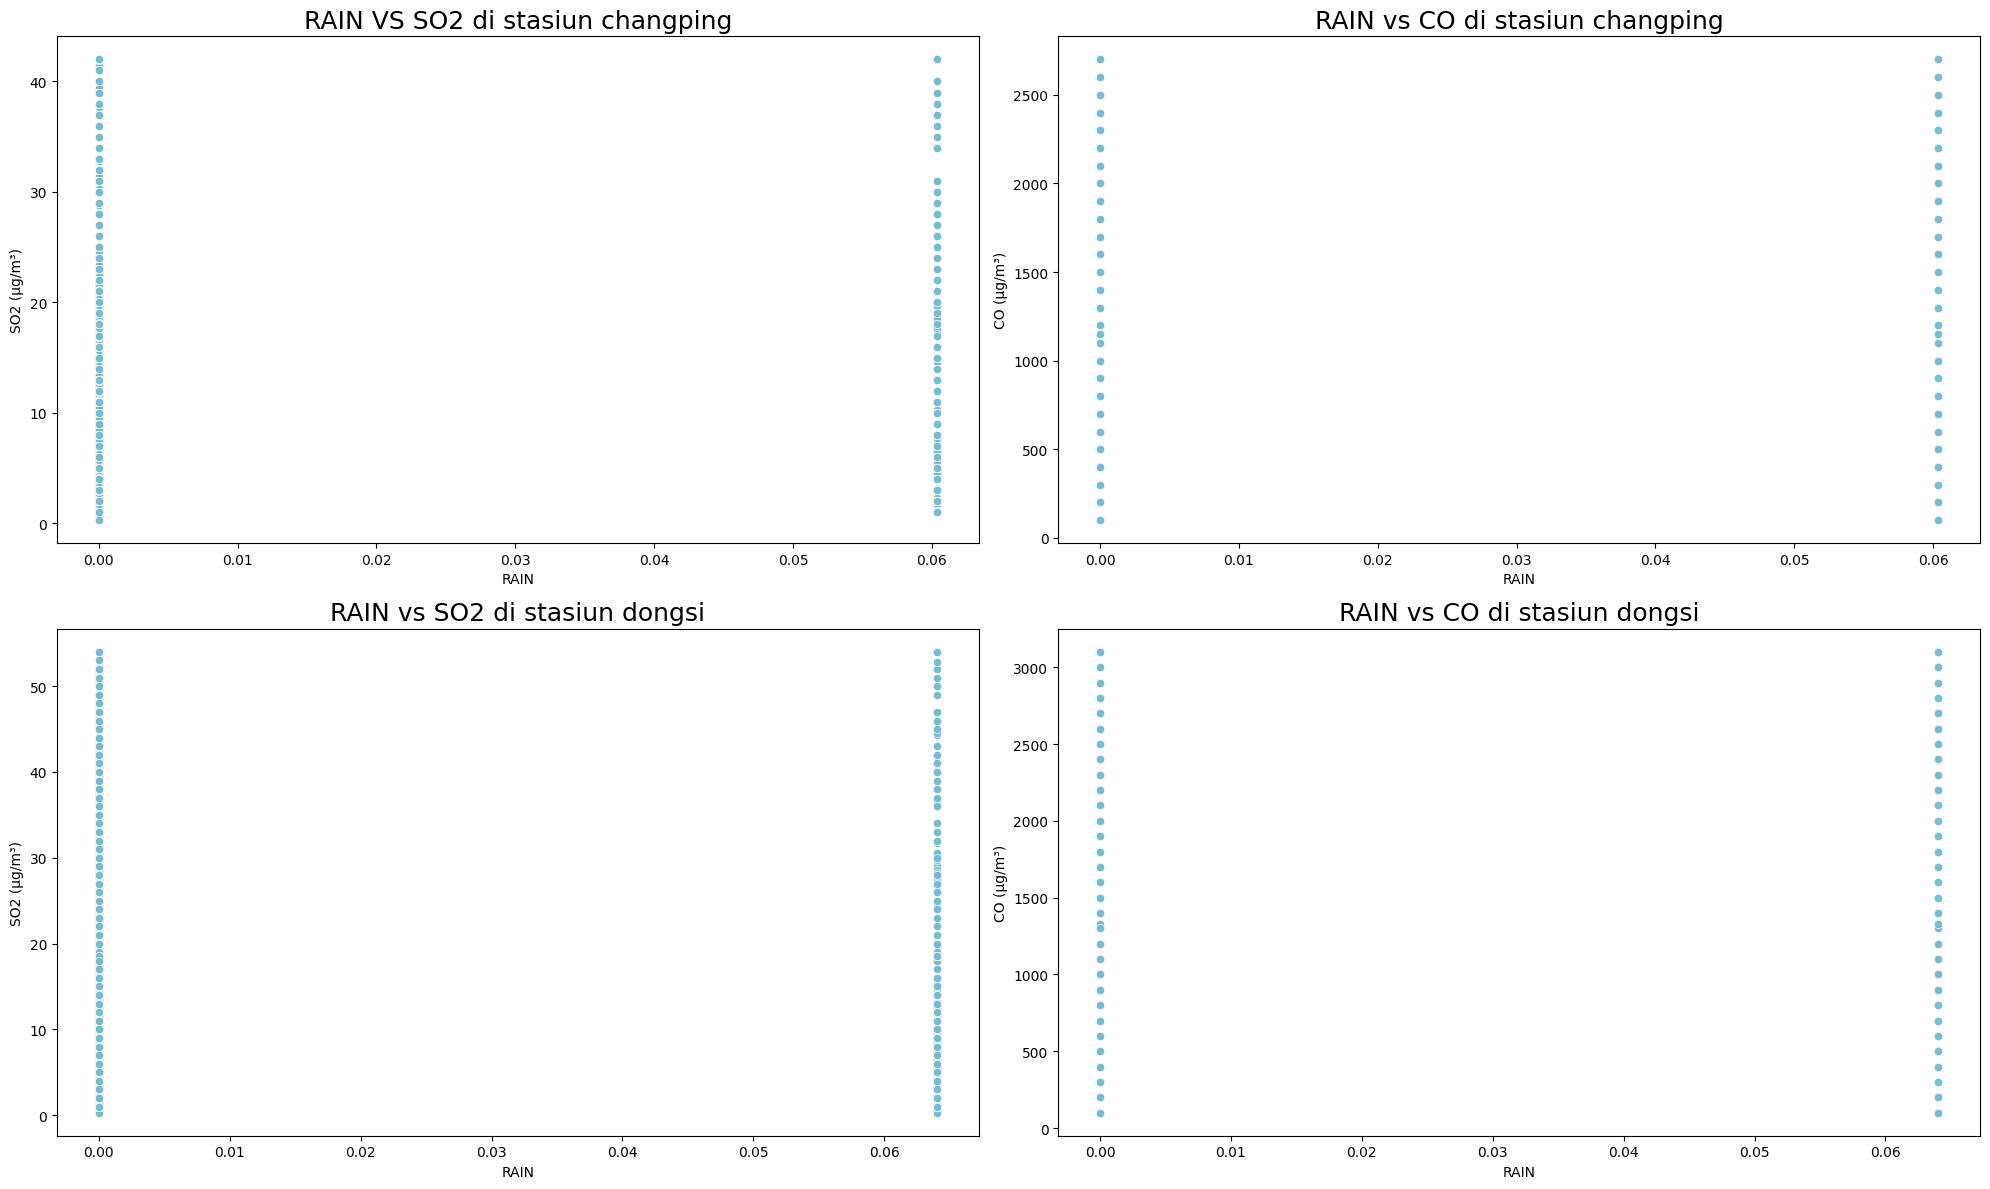

In [172]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.scatterplot(x='RAIN', y='SO2', data=df_changping, color="#72BCD4", ax=ax[0, 0])
ax[0, 0].set_title("RAIN VS SO2 di stasiun changping", loc="center", fontsize=18)
ax[0, 0].set_xlabel("RAIN")
ax[0, 0].set_ylabel("SO2 (µg/m³)")

sns.scatterplot(x='RAIN', y='CO', data=df_changping, color="#72BCD4", ax=ax[0, 1])
ax[0, 1].set_title("RAIN vs CO di stasiun changping", loc="center", fontsize=18)
ax[0, 1].set_xlabel("RAIN")
ax[0, 1].set_ylabel("CO (µg/m³)")

sns.scatterplot(x='RAIN', y='SO2', data=df_dongsi, color="#72BCD4", ax=ax[1, 0])
ax[1, 0].set_title("RAIN vs SO2 di stasiun dongsi", loc="center", fontsize=18)
ax[1, 0].set_xlabel("RAIN")
ax[1, 0].set_ylabel("SO2 (µg/m³)")

sns.scatterplot(x='RAIN', y='CO', data=df_dongsi, color="#72BCD4", ax=ax[1, 1])
ax[1, 1].set_title("RAIN vs CO di stasiun dongsi", loc="center", fontsize=18)
ax[1, 1].set_xlabel("RAIN")
ax[1, 1].set_ylabel("CO (µg/m³)")

plt.tight_layout()
plt.show()

## Geospatial analysis

>**untuk menjawab pertanyaan terakhir kita dapat menggunakan Geospatial analysis**
>
>disini menggunakan map dari folium
>
>yang didapatkan dari map folium adalah tempat memengaruhi distribusi polusi stasiun pengamatan changping berada di pinggir kota (suburban) sedangkan changpin berapa di tengah kota(urban)

>**menentukan lokasi dari tiap tiap stasiun**

In [173]:
locations = {
    'Changping': {'lat': 40.2181, 'lon': 116.1944}, 
    'Dongsi': {'lat': 39.9298, 'lon': 116.4179}      
}

>**melakukan indexing untuk mengambil nilai mean dari kolom pm2.5 dan pm10**

In [174]:
changping_mean = df_changping[['PM2.5', 'PM10']].mean()
dongsi_mean = df_dongsi[['PM2.5', 'PM10']].mean()

In [175]:
m = folium.Map(location=[40.06, 116.2], zoom_start=10)

folium.CircleMarker(
    location=[locations['Changping']['lat'], locations['Changping']['lon']],
    radius=20,
    popup=f"Changping<br>PM2.5: {changping_mean['PM2.5']:.0f}<br>PM10: {changping_mean['PM10']:.0f} (µg/m³)",
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.7
).add_to(m)

folium.CircleMarker(
    location=[locations['Dongsi']['lat'], locations['Dongsi']['lon']],
    radius=20,
    popup=f"Dongsi<br>PM2.5: {dongsi_mean['PM2.5']:.0f}<br>PM10: {dongsi_mean['PM10']:.0f} (µg/m³)",
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.7
).add_to(m)

m

>**memperjelas distribusi pada tiap stasiun menggunakan boxplot**
>
>hasil boxplot menunjukkan bahwa distribusi polusi pada stasiun dongsi lebih tinggi dibandingkan stasiun changping,ini juga memperkuat pernyataan sebelumnya bahwa lokasi suburban lebih rendah polusi nya daripada urban

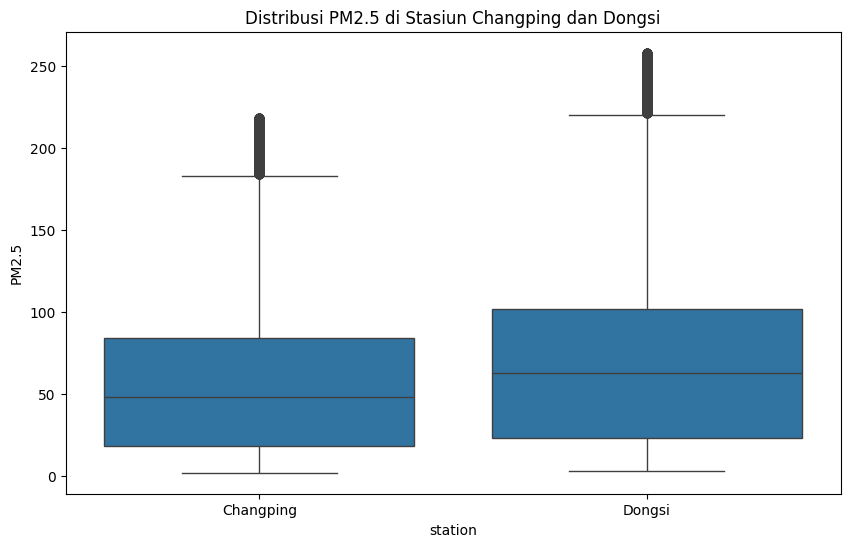

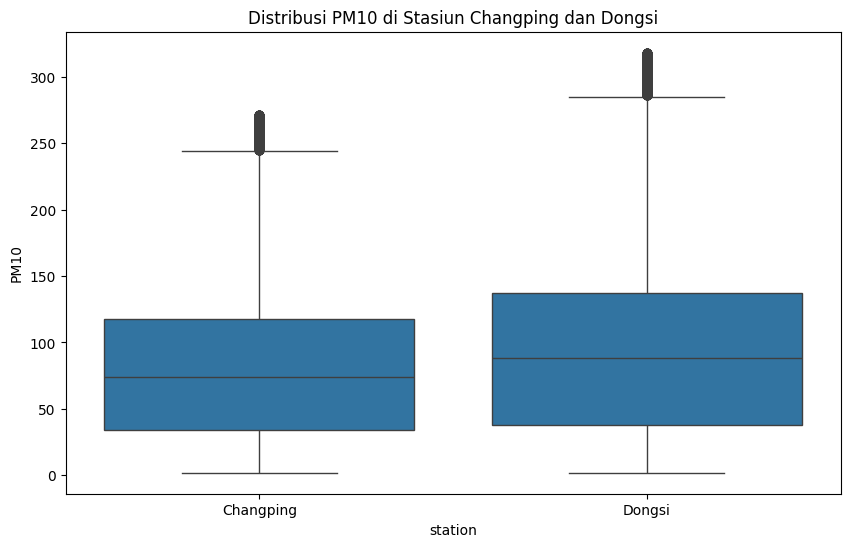

In [176]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='PM2.5', data=df_gabungan_data)
plt.title('Distribusi PM2.5 di Stasiun Changping dan Dongsi')
plt.show()

# Plot boxplot untuk distribusi PM10
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='PM10', data=df_gabungan_data)
plt.title('Distribusi PM10 di Stasiun Changping dan Dongsi')
plt.show()

**Insight:**
- perubahan rata rata PM2.5 dan PM10 per tahun nya
- waktu dimana perubahan rata rata polutan mencapai titik maks dan min
- pengaruh lokasi pada distribusi polutan

## Conclusion

- Conclution pertanyaan 1 adalah hasil visualisasi dari pertanyaan 1 meunjukkan bahwa pada rentang waktu 2014-2016 terjadi penurunan kadar polutan PM2.5 DAN PM10 disetiap lokasi stasiun

- Conclution pertanyaan 2 adalah dari hasil visualisasi pertanyaan 2 menunjukkan adanya perbedaan aktivitas polutan pada jam jam tertentu pada tiap stasiun,contohnya:
pada stasiun changping kadar polutan hanya tinggi pada waktu siang dan malam hari,saat pagi hari dan sore hari menunjukkan penurunan,sedangkan
pada stasiun dongsi kadar polutan hanya turun pada sore hari saja sisa nya stabil

- Conclution pertanyaan 3 sudah diketahui sebelumnya bahwa keadaan cuaca tidak memengaruhi polutan sama sekali

- Conclution pertanyaan 4 geospatial analysis menunjukkan bahwa lokasi urban memiliki distribusi polutan yang lebih tinggi dibanding lokas suburban 

In [177]:
df_changping.to_csv("changping.csv", index=False)

In [178]:
df_dongsi.to_csv("dongsi.csv", index=False)

In [179]:
df_gabungan_data.to_csv("gabungan.csv", index=False)